In [19]:
pip install pandas


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: C:\Users\USER\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [20]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: seaborn in c:\users\user\appdata\local\packages\pythonsoftwarefoundation.python.3.11_qbz5n2kfra8p0\localcache\local-packages\python311\site-packages (0.13.2)




[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: C:\Users\USER\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import os
from datetime import datetime

# Configuring the project's root directory and the raw and processed data paths
project_root = os.path.dirname(os.getcwd())
data_path = os.path.join(project_root, "data", "raw")
processed_data_path = os.path.join(project_root, "data", "processed")

# Creating the processed data path directory if it does not exist
os.makedirs(processed_data_path, exist_ok=True)

np.random.seed(42)

# Setting up the pandas display options and Seaborn style.
pd.set_option('display.max_columns', None)
sns.set_style("whitegrid")

def load_all_csv_files(data_path):
    """
    Loading and merging all CSV files from the specified directory
    """
    print(f"Searching for CSV files in: {os.path.abspath(data_path)}")
    
    # Getting all CSV files in the designated directory that begin with "colchester_"
    all_files = glob.glob(os.path.join(data_path, "colchester_*.csv"))
    
    print(f"Found {len(all_files)} files:")
    for file in all_files[:5]:
        print(f"- {os.path.basename(file)}")
    if len(all_files) > 5:
        print("...")
    
    # Error if no CSV files are found
    if not all_files:
        raise ValueError(f"No CSV files found in {data_path}. Please check the directory path.")
    
    df_list = []
    for filename in all_files:
        try:
            # Check the columns by reading the first 5 rows
            df = pd.read_csv(filename, nrows=5)
            print(f"\nColumns in {os.path.basename(filename)}:")
            print(df.columns.tolist())

            # For proper parsing, check if the 'datetime' column exists.
            if 'datetime' in df.columns:
                df = pd.read_csv(filename, parse_dates=['datetime'])
            else:
                df = pd.read_csv(filename)
                print(f"Warning: 'datetime' column not found in {os.path.basename(filename)}")
            
            df_list.append(df) # DataFrame should be added to the list
        except Exception as e:
            print(f"Error reading {os.path.basename(filename)}: {str(e)}")
    
    # If no legitimate CSV files were read, raise an error
    if not df_list:
        raise ValueError("No valid CSV files could be read.")
    
    # combining the data into one
    df_combined = pd.concat(df_list, axis=0, ignore_index=True)
    
    return df_combined

# We load the data
df = load_all_csv_files(data_path)
print(f"\nShape of the combined dataframe: {df.shape}")

# Display the combined DataFrame's  for few rows
print("\nColumns in the combined dataframe:")
print(df.columns.tolist())

# Display the combined DataFrame's  for first few rows
print("\nFirst few rows of the combined dataframe:")
print(df.head())

# Display the missing Values in the dataframe
print("\nMissing values in the combined dataframe:")
print(df.isnull().sum())

# Display the statistical summary 
print("\nStatistical summary of the combined dataframe:")
print(df.describe())

# loading the file 
df = load_all_csv_files(data_path)
print(f"\nShape of the combined dataframe: {df.shape}")

#Sorting the dataframe on 'datetime'
df = df.sort_values('datetime')


Searching for CSV files in: c:\Users\USER\Desktop\DATASCIENCE\solar_energy_project\data\raw
Found 194 files:
- colchester_001.csv
- colchester_002.csv
- colchester_003.csv
- colchester_004.csv
- colchester_006.csv
...

Columns in colchester_001.csv:
['datetime', 'temp', 'dew', 'humidity', 'precip', 'precipprob', 'preciptype', 'snow', 'snowdepth', 'windspeed', 'winddir', 'sealevelpressure', 'cloudcover', 'solarradiation', 'uvindex']

Columns in colchester_002.csv:
['Unnamed: 0', 'datetime', 'temp', 'dew', 'humidity', 'precip', 'precipprob', 'preciptype', 'snow', 'snowdepth', 'windspeed', 'winddir', 'sealevelpressure', 'cloudcover', 'solarradiation', 'solarenergy', 'uvindex']

Columns in colchester_003.csv:
['datetime', 'temp', 'dew', 'humidity', 'precip', 'precipprob', 'preciptype', 'snow', 'snowdepth', 'windspeed', 'winddir', 'sealevelpressure', 'cloudcover', 'solarradiation', 'solarenergy', 'uvindex']

Columns in colchester_004.csv:
['datetime', 'temp', 'dew', 'humidity', 'precip', 'p

In [22]:
# specifying which features should remain in the DataFrame
features = ['datetime', 'temp', 'humidity', 'windspeed', 'cloudcover', 'solarradiation']
df = df[features]

# Dropping duplicates values
df = df.drop_duplicates()

# Filling the null values in the column 'solarradiation' with 0
df['solarradiation'] = df['solarradiation'].fillna(0)

# Remove any rows that still have values missing from other columns
df = df.dropna() 



In [23]:
def calculate_solar_energy(df):
    """
    Calculate solar energy production based on solar radiation
    Assuming 500 solar panels with standard efficiency
    """
    num_panels = 500
    panel_efficiency = 0.2 
    panel_area = 1.6  
    
    # Compute solar radiation to determine solar energy, then add the result as a new column in the DataFrame
    df['solar_energy'] = (df['solarradiation'] * num_panels * 
                         panel_efficiency * panel_area)
    return df

# Update the DataFrame by calling the function to compute solar energy
df = calculate_solar_energy(df)

# Display the dataset information 
print("\nDataset Info:")
print(df.info())

# Display the first few rows 
print("\nFirst few rows of the dataset:")
print(df.head())

# Display the missing values
print("\nMissing values:")
print(df.isnull().sum())

# Display the statistical summary
print("\nStatistical summary:")
print(df.describe())




Dataset Info:
<class 'pandas.core.frame.DataFrame'>
Index: 111821 entries, 1 to 186176
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   datetime        111821 non-null  datetime64[ns]
 1   temp            111821 non-null  float64       
 2   humidity        111821 non-null  float64       
 3   windspeed       111821 non-null  float64       
 4   cloudcover      111821 non-null  float64       
 5   solarradiation  111821 non-null  float64       
 6   solar_energy    111821 non-null  float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 6.8 MB
None

First few rows of the dataset:
             datetime  temp  humidity  windspeed  cloudcover  solarradiation  \
1 2000-01-01 01:00:00   6.4     96.12       15.1       100.0             0.0   
2 2000-01-01 02:00:00   6.6     98.31       13.9       100.0             0.0   
3 2000-01-01 03:00:00   7.2     95.92       14.1       100.0       

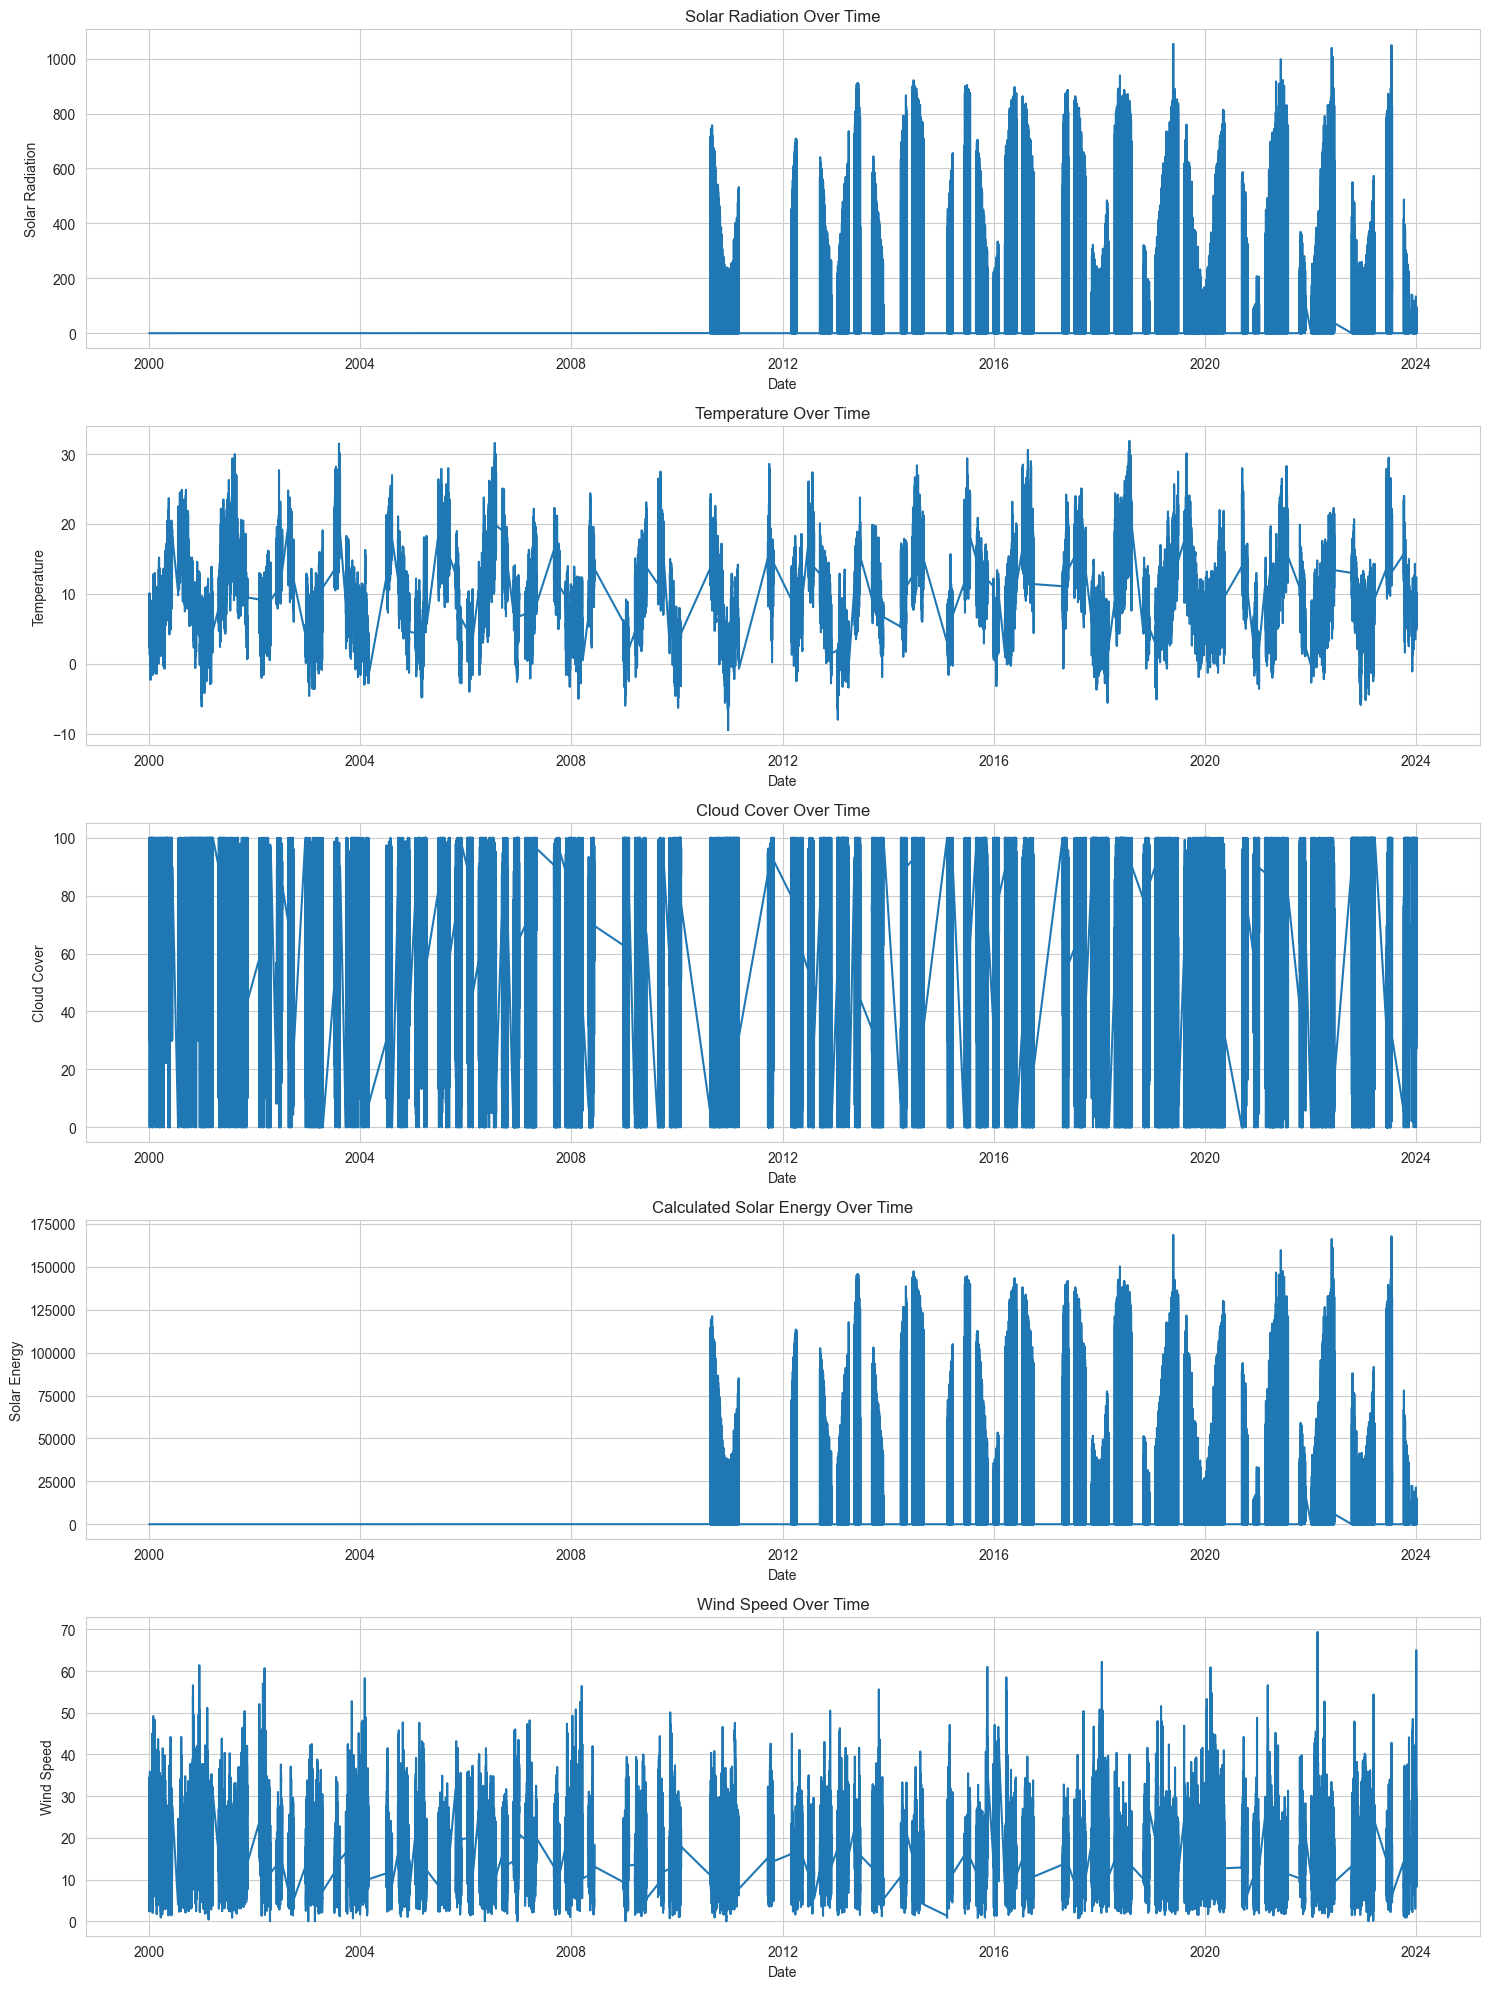

In [24]:
plt.figure(figsize=(15, 20))

# Plotting solar radiation vs time
plt.subplot(5, 1, 1)
plt.plot(df['datetime'], df['solarradiation'])
plt.title('Solar Radiation Over Time')
plt.xlabel('Date')
plt.ylabel('Solar Radiation')

# plotting temperature vs time
plt.subplot(5, 1, 2)
plt.plot(df['datetime'], df['temp'])
plt.title('Temperature Over Time')
plt.xlabel('Date')
plt.ylabel('Temperature')

# plotting cloud cover vs time
plt.subplot(5, 1, 3)
plt.plot(df['datetime'], df['cloudcover'])
plt.title('Cloud Cover Over Time')
plt.xlabel('Date')
plt.ylabel('Cloud Cover')


# plotting solar energy vs time
plt.subplot(5, 1, 4)
plt.plot(df['datetime'], df['solar_energy'])
plt.title('Calculated Solar Energy Over Time')
plt.xlabel('Date')
plt.ylabel('Solar Energy')

# plotting wind speed vs time
plt.subplot(5, 1, 5)
plt.plot(df['datetime'], df['windspeed'])
plt.title('Wind Speed Over Time')
plt.xlabel('Date')
plt.ylabel('Wind Speed')

# Adjusting layout 
plt.tight_layout()
plt.savefig(os.path.join(project_root, "results", "figures", "time_series_plots.png"))
plt.show()




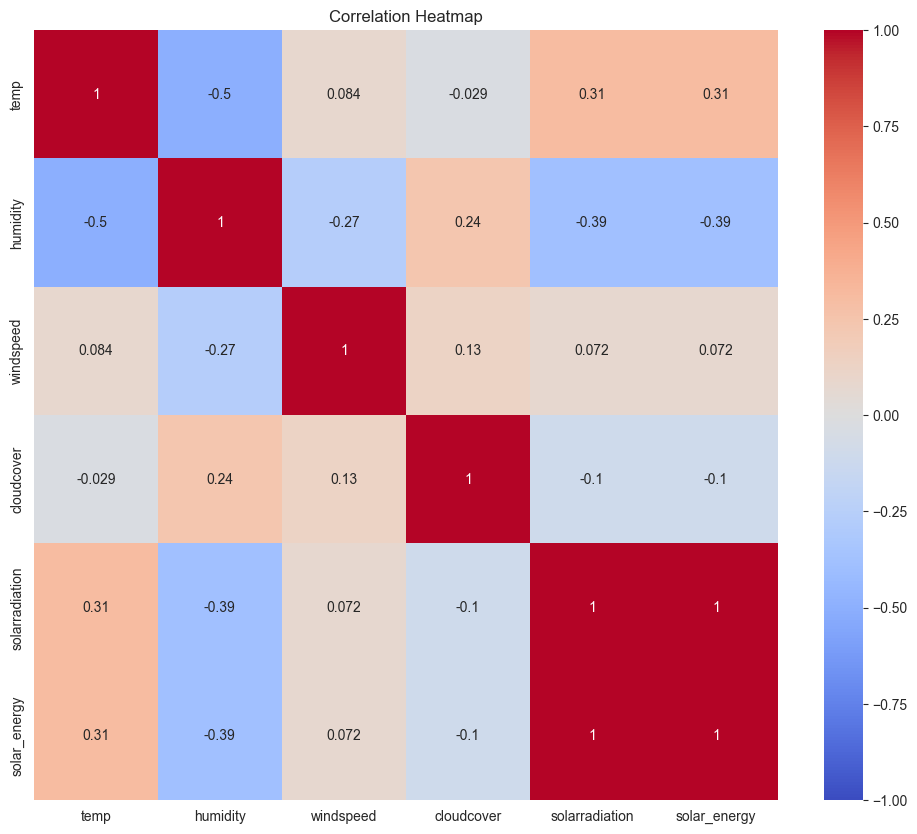


Calculated threshold: 60000.00 kWh


In [25]:
# Correlation matrix for particular features and solar energy
correlation_matrix = df[features[1:] + ['solar_energy']].corr()

# heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Correlation Heatmap')
plt.savefig(os.path.join(project_root, "results", "figures", "correlation_heatmap.png"))
plt.show()

def calculate_threshold():
    """
    # Utilising predetermined parameters, determine the energy threshold

    """
    N_colchester = 75000 # Total units in colchester
    N_pilot = N_colchester * 0.12 # pilot units
    E = 0.5 # Efficiency factor 
    K = 5 # Constant multiplier

    # Formula to calculate threshold
    threshold = N_pilot * E * K + N_colchester * E
    return threshold

# Calculating threshold by calling function
threshold = calculate_threshold()
print(f"\nCalculated threshold: {threshold:.2f} kWh")

# Saving the processed dataframe into csv file.
output_path = os.path.join(processed_data_path, "processed_data.csv")
df.to_csv(output_path, index=False)